In [1]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 220 kB 7.1 MB/s 


In [1]:
!pip install textract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


                                      score
AI & Data analytics                      28
Organization and  Leadership  Skills     28
Project management                       21
Healthcare                               12
Statistics                                6
IT                                        1


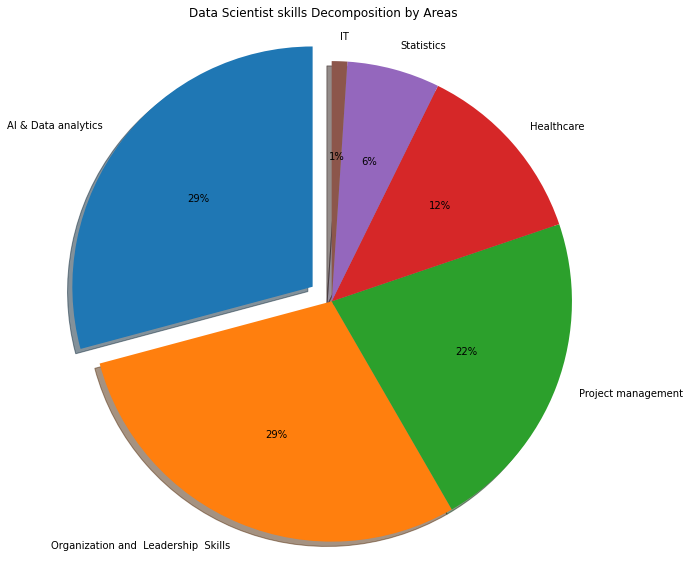

In [4]:
# Import required libraries
import PyPDF2
import textract
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Open pdf file
pdfFileObj = open('/content/drive/MyDrive/indeed_job_dataset.pdf','rb')

# Read file
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

# Get total number of pages
num_pages = pdfReader.numPages

# Initialize a count for the number of pages
count = 0

# Initialize a text empty string variable
text = ""

# Extract text from every page on the file
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()
    
# Convert all strings to lowercase
text = text.lower()
#print(text)
# Remove numbers
text = re.sub(r'\d+','',text)

# Remove punctuation
text = text.translate(str.maketrans('','',string.punctuation))

# Create dictionary with industrial and system engineering key terms by area
terms = {'IT':['Python','Numpy','Pandas','Matplotlib','Seaborn','Scikit-learn','PyTorch',
                                                       'R programming','Data structures','algorithms',
                                                       'DBMS','Cyber security','Web programming and development','Cloud computing',
                                                       'Computer vision and Image Processing'],      
        'Statistics':['Calculus','Linear Algebra','Probability','statistics',
                                               'Regression','correlation','hypothesis','timeseries','decision making'],
        
        'Project management':['administration','agile','budget','cost','direction','feasibility analysis',
                              'finance','kanban','leader','leadership','management','milestones','planning',
                              'pmi','pmp','problem','project','risk','schedule','scrum','stakeholders'],
        'AI & Data analytics':['Data modeling','Data mining','Data visualization - Tableau','Data wrangling and preprocessing','Pattern Recognition','analytics','api','aws','big data','business intelligence','clustering','code',
                          'coding','Machine Learning','Deep Learning','Apache Spark','data','database','data mining','data science','deep learning','hadoop',
                          'hypothesis test','iot','internet','machine learning','modeling','nosql','nlp','Neural Networks','Keras','Tensor Flow',
                          'predictive','programming','python','r','sql','tableau','text mining','Hadoop','Reinforcement Learning',
                          'visualuzation'],
        'Healthcare':['adverse events','care','clinic','cphq','ergonomics','healthcare',
                      'health care','health','hospital','human factors','medical','near misses',
                      'patient','reporting system','Drug Development  processes','Patient care operations','Healthcare regulations','Human resource functions  in healthcare facilities'],
         
        'Organization and  Leadership  Skills':['Interpersonal communication','Team work','Decision making','Lifelong learning',
                                                'Ethical practice'],
         }

# Initializie score counters for each area
quality = 0
operations = 0
project = 0
data = 0
healthcare = 0

# Create an empty list where the scores will be stored
scores = []

# Obtain the scores for each area
for area in terms.keys():
        
    if area == 'IT':
        for word in terms[area]:
            if word in text:
                quality +=1
        scores.append(quality)
        
    elif area == 'Statistics':
        for word in terms[area]:
            if word in text:
                operations +=1
        scores.append(operations)
        
    elif area == 'Project management':
        for word in terms[area]:
            if word in text:
                project +=1
        scores.append(project)
        
    elif area == 'AI & Data analytics':
        for word in terms[area]:
            if word in text:
                data +=1
        scores.append(data)

    elif area == 'Organization and  Leadership  Skills':
        for word in terms[area]:
            if word in text:
                data +=1
        scores.append(data)
        
    else:
        for word in terms[area]:
            if word in text:
                healthcare +=1
        scores.append(healthcare)
        
# Create a data frame with the scores summary
summary = pd.DataFrame(scores,index=terms.keys(),columns=['score']).sort_values(by='score',ascending=False)
print(summary)

# Create pie chart visualization
pie = plt.figure(figsize=(10,10))
plt.pie(summary['score'], labels=summary.index,explode = (0.1,0,0,0,0,0), autopct='%1.0f%%',shadow=True,startangle=90)
plt.title('Data Scientist skills Decomposition by Areas')
plt.axis('equal')
plt.show()

# Save pie chart as a .png file
pie.savefig('/content/drive/MyDrive/resume_screening_results.png')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
